In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/EmployeeAttrition.csv")

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# This is data for supervised learning

Target : Attrition (Y)

In [ ]:
X = df.drop("Attrition",axis=1)
Y = df['Attrition']

In [ ]:
X.shape, Y.shape

((1470, 34), (1470,))

In [ ]:
X_ohe = pd.get_dummies(X)

In [ ]:
X_ohe.shape

(1470, 55)

In [ ]:
X_ohe.isna().sum()

,0
Age,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0
HourlyRate,0
JobInvolvement,0
JobLevel,0


In [ ]:
rem_col = X_ohe.columns[X_ohe.nunique()==1]

In [ ]:
X_ohe.drop(rem_col, axis=1,inplace=True)

In [ ]:
X_ohe.shape

(1470, 52)

In [ ]:
X_ohe.drop("EmployeeNumber",axis=1,inplace=True)

In [ ]:
X_ohe.shape

(1470, 51)

In [ ]:
X_ohe.drop_duplicates(inplace=True)

In [ ]:
X_ohe.shape

(1470, 51)

In [ ]:
Y.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
Y = Y.replace({'Yes':1, 'No':0})

/tmp/ipython-input-3805951796.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace({'Yes':1, 'No':0})


In [ ]:
Y.unique()

array([1, 0])

In [ ]:
X_ohe_std = (X_ohe-X_ohe.mean())/X_ohe.std()

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
                    X_ohe,Y,test_size=0.3,random_state=7
                    )

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1029, 51), (441, 51), (1029,), (441,))

# PCA without standardization (NOT REcommended )

----- WRONG ----

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=7)

In [ ]:
pca.fit(X_train,Y_train) #Y_train NOT Compulsory

PCA(random_state=7)

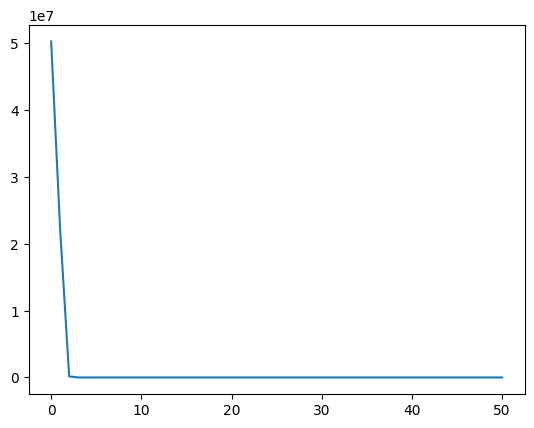

In [ ]:
from matplotlib import pyplot as plt
plt.plot(pca.explained_variance_)

# PCA with Standardization( Recommended)

--- RIGHT-----

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(
                    X_ohe_std,Y,test_size=0.3,random_state=7
                    )

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1029, 51), (441, 51), (1029,), (441,))

In [ ]:
pca = PCA(random_state=7)

In [ ]:
pca.fit(X_train,Y_train)

PCA(random_state=7)

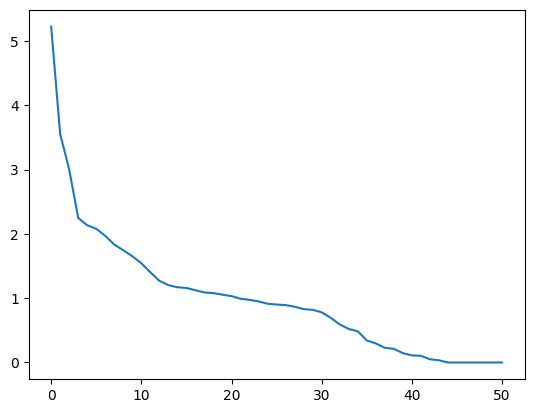

In [ ]:
from matplotlib import pyplot as plt
plt.plot(pca.explained_variance_)

In [ ]:
pca.components_.shape

(51, 51)

## Perform DIM reduction

In [ ]:
pca = PCA(n_components=0.99, random_state=7)
pca.fit(X_train,Y_train)

PCA(n_components=0.99, random_state=7)

In [ ]:
pca.components_.shape

(39, 51)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
X_train_pca.shape, X_test_pca.shape

((1029, 39), (441, 39))

# Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=39,
                 kernel='rbf',
                 random_state=7)
kpca.fit(X_train,Y_train)
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [ ]:
X_train_kpca.shape, X_test_kpca.shape

((1029, 39), (441, 39))

# RFE Feature selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(LogisticRegression(random_state=7))
rfe.fit(X_train,Y_train)

RFE(estimator=LogisticRegression(random_state=7))

In [ ]:
rfe.ranking_

array([ 1, 19,  1, 21,  1, 16,  1, 22,  1,  1, 18,  1, 17, 27,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  7,  1, 13,  2, 20, 14, 23, 10,  1,  9, 26,
        1,  8,  1,  1,  3,  5, 24, 25,  4,  1, 15,  6, 12, 11,  1,  1,  1])

In [ ]:
sel_col = X_train.columns[rfe.ranking_==1]

In [ ]:
sel_col

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Research Scientist',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'],
      dtype='object')

In [ ]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [ ]:
X_train_rfe.shape, X_test_rfe.shape

((1029, 25), (441, 25))